# Projeto 1 - SCC5809 - Redes Neurais e Aprendizado Profundo

## Wine - Classificação

### 1. Bibliotecas necessárias:

In [149]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [150]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
#Geração de gráficos:
import matplotlib.pyplot as plt
#Bibliotecas específicas para o aprendizado de máquina:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier

### 2. Extração e Carregamento dos Dados (Etapa Extract and Load)
### Importando o Dataset e Carregando em DataFrame:

In [151]:
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 
  
# metadata 
print(wine.metadata) 
  
# variable information 
print(wine.variables) 

#Criação do DataFrame em Pandas:
X = pd.DataFrame(X)
y = pd.DataFrame(y)


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

In [152]:
X.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [153]:
escala = StandardScaler()
escala.fit(X)
X_norm = escala.transform(X)

In [154]:
X_norm_train, X_norm_test, Y_train, Y_test = train_test_split(X_norm, y, test_size=0.3)

In [155]:
rna = MLPClassifier(hidden_layer_sizes=(100,50),
                    max_iter=3000,
                    tol=0.0000001,
                    learning_rate_init=0.1,
                    solver='sgd',
                    activation='logistic',
                    learning_rate="constant",
                    verbose=2,
                    momentum=0.9
                    )

In [156]:
rna.fit(X_norm_train, Y_train)

Iteration 1, loss = 1.23212190
Iteration 2, loss = 1.08516196
Iteration 3, loss = 1.10449050
Iteration 4, loss = 1.10194956
Iteration 5, loss = 1.08276612
Iteration 6, loss = 1.07526823
Iteration 7, loss = 1.07282953
Iteration 8, loss = 1.06984210
Iteration 9, loss = 1.06612179
Iteration 10, loss = 1.06232948
Iteration 11, loss = 1.05843380
Iteration 12, loss = 1.05426042
Iteration 13, loss = 1.04973478
Iteration 14, loss = 1.04482530
Iteration 15, loss = 1.03949459
Iteration 16, loss = 1.03368493
Iteration 17, loss = 1.02732444
Iteration 18, loss = 1.02033304
Iteration 19, loss = 1.01262013
Iteration 20, loss = 1.00408119
Iteration 21, loss = 0.99459677
Iteration 22, loss = 0.98403235
Iteration 23, loss = 0.97223788
Iteration 24, loss = 0.95904773
Iteration 25, loss = 0.94428170
Iteration 26, loss = 0.92774770
Iteration 27, loss = 0.90924656
Iteration 28, loss = 0.88857968
Iteration 29, loss = 0.86556043
Iteration 30, loss = 0.84002972
Iteration 31, loss = 0.81187593
Iteration 32, los

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 50, loss = 0.17713049
Iteration 51, loss = 0.16102466
Iteration 52, loss = 0.14680485
Iteration 53, loss = 0.13426044
Iteration 54, loss = 0.12318989
Iteration 55, loss = 0.11340704
Iteration 56, loss = 0.10474445
Iteration 57, loss = 0.09705444
Iteration 58, loss = 0.09020853
Iteration 59, loss = 0.08409592
Iteration 60, loss = 0.07862163
Iteration 61, loss = 0.07370441
Iteration 62, loss = 0.06927480
Iteration 63, loss = 0.06527338
Iteration 64, loss = 0.06164916
Iteration 65, loss = 0.05835829
Iteration 66, loss = 0.05536289
Iteration 67, loss = 0.05263014
Iteration 68, loss = 0.05013148
Iteration 69, loss = 0.04784196
Iteration 70, loss = 0.04573967
Iteration 71, loss = 0.04380533
Iteration 72, loss = 0.04202191
Iteration 73, loss = 0.04037433
Iteration 74, loss = 0.03884919
Iteration 75, loss = 0.03743457
Iteration 76, loss = 0.03611986
Iteration 77, loss = 0.03489559
Iteration 78, loss = 0.03375332
Iteration 79, loss = 0.03268549
Iteration 80, loss = 0.03168537
Iteratio

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 50),
              learning_rate_init=0.1, max_iter=3000, solver='sgd', tol=1e-07,
              verbose=2)

In [157]:
Y_rna_previsao = rna.predict(X_norm_test)

In [158]:
r2 = r2_score(Y_test, Y_rna_previsao)
print(r2)

0.9692657939669892


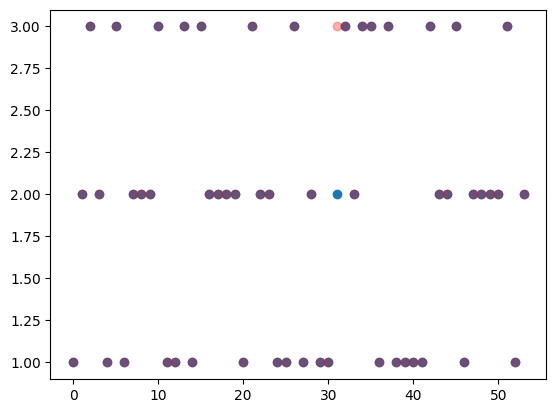

In [159]:
x_i = [x for x in range(len(Y_test))]
plt.scatter(x_i, Y_test)
plt.scatter(x_i, Y_rna_previsao, alpha=0.3, color="Red")